# Design and Programming Tasks

You'll be assigned a fun task: design and outline a high-level implementation for both FaaS and OaaS approaches\! Focus on defining key functions and essential components, like storage or message brokers for FaaS, and object methods or state for OaaS. No need for super detailed code; pseudocode or simple diagrams are totally fine to help illustrate your awesome ideas.

For research purposes, we also need to track your time for each task. Please grab a [stopwatch](https://www.timeanddate.com/stopwatch/)—start it right after you finish reading this and click the “split” button to record the time after completing each task. When you’re done, just export the timings and pop them into the Post-Task Questionnaire Google form. Easy peasy\!

Once you've wrapped up your initial design, you'll get a new requirement that'll prompt you to consider how you might playfully modify your design to meet it.

### **Timing Instructions**

Before you dive in, please get a [stopwatch](https://www.timeanddate.com/stopwatch/) ready. We need to track the time it takes for each part of the task for our research.

* **Start the stopwatch** as soon as you finish reading the task description for the first time.  
* For each approach (FaaS and OaaS):  
  * First, create a **diagram** for your design. When you're done with the diagram, click the **"split" button** on your stopwatch.  
  * Next, write the code. When you're done with the implementation, click the **"split" button** again.  
* When you get to the **"Time for a Change-Up\!"** section, click the **"split" button** right after you finish reading the new requirement for the task.  
* For the maintainability task on each approach:  
  * First, **update your diagram**. When you're done, click **"split"**.  
  * Then, **update your code**. When you're done, click **"split"**.  
* Once you've completed all parts of a task, you can **pause the stopwatch**.

When you're all done, please export the timings and copy them into the Post-Task Questionnaire. Thanks\!

In summary, the process for completing a task is outlined below. Feel free to start with either FaaS or OaaS first, giving you the flexibility to swap the order of stages 2 and 3, or stages 5 and 6, to best suit your preferences.

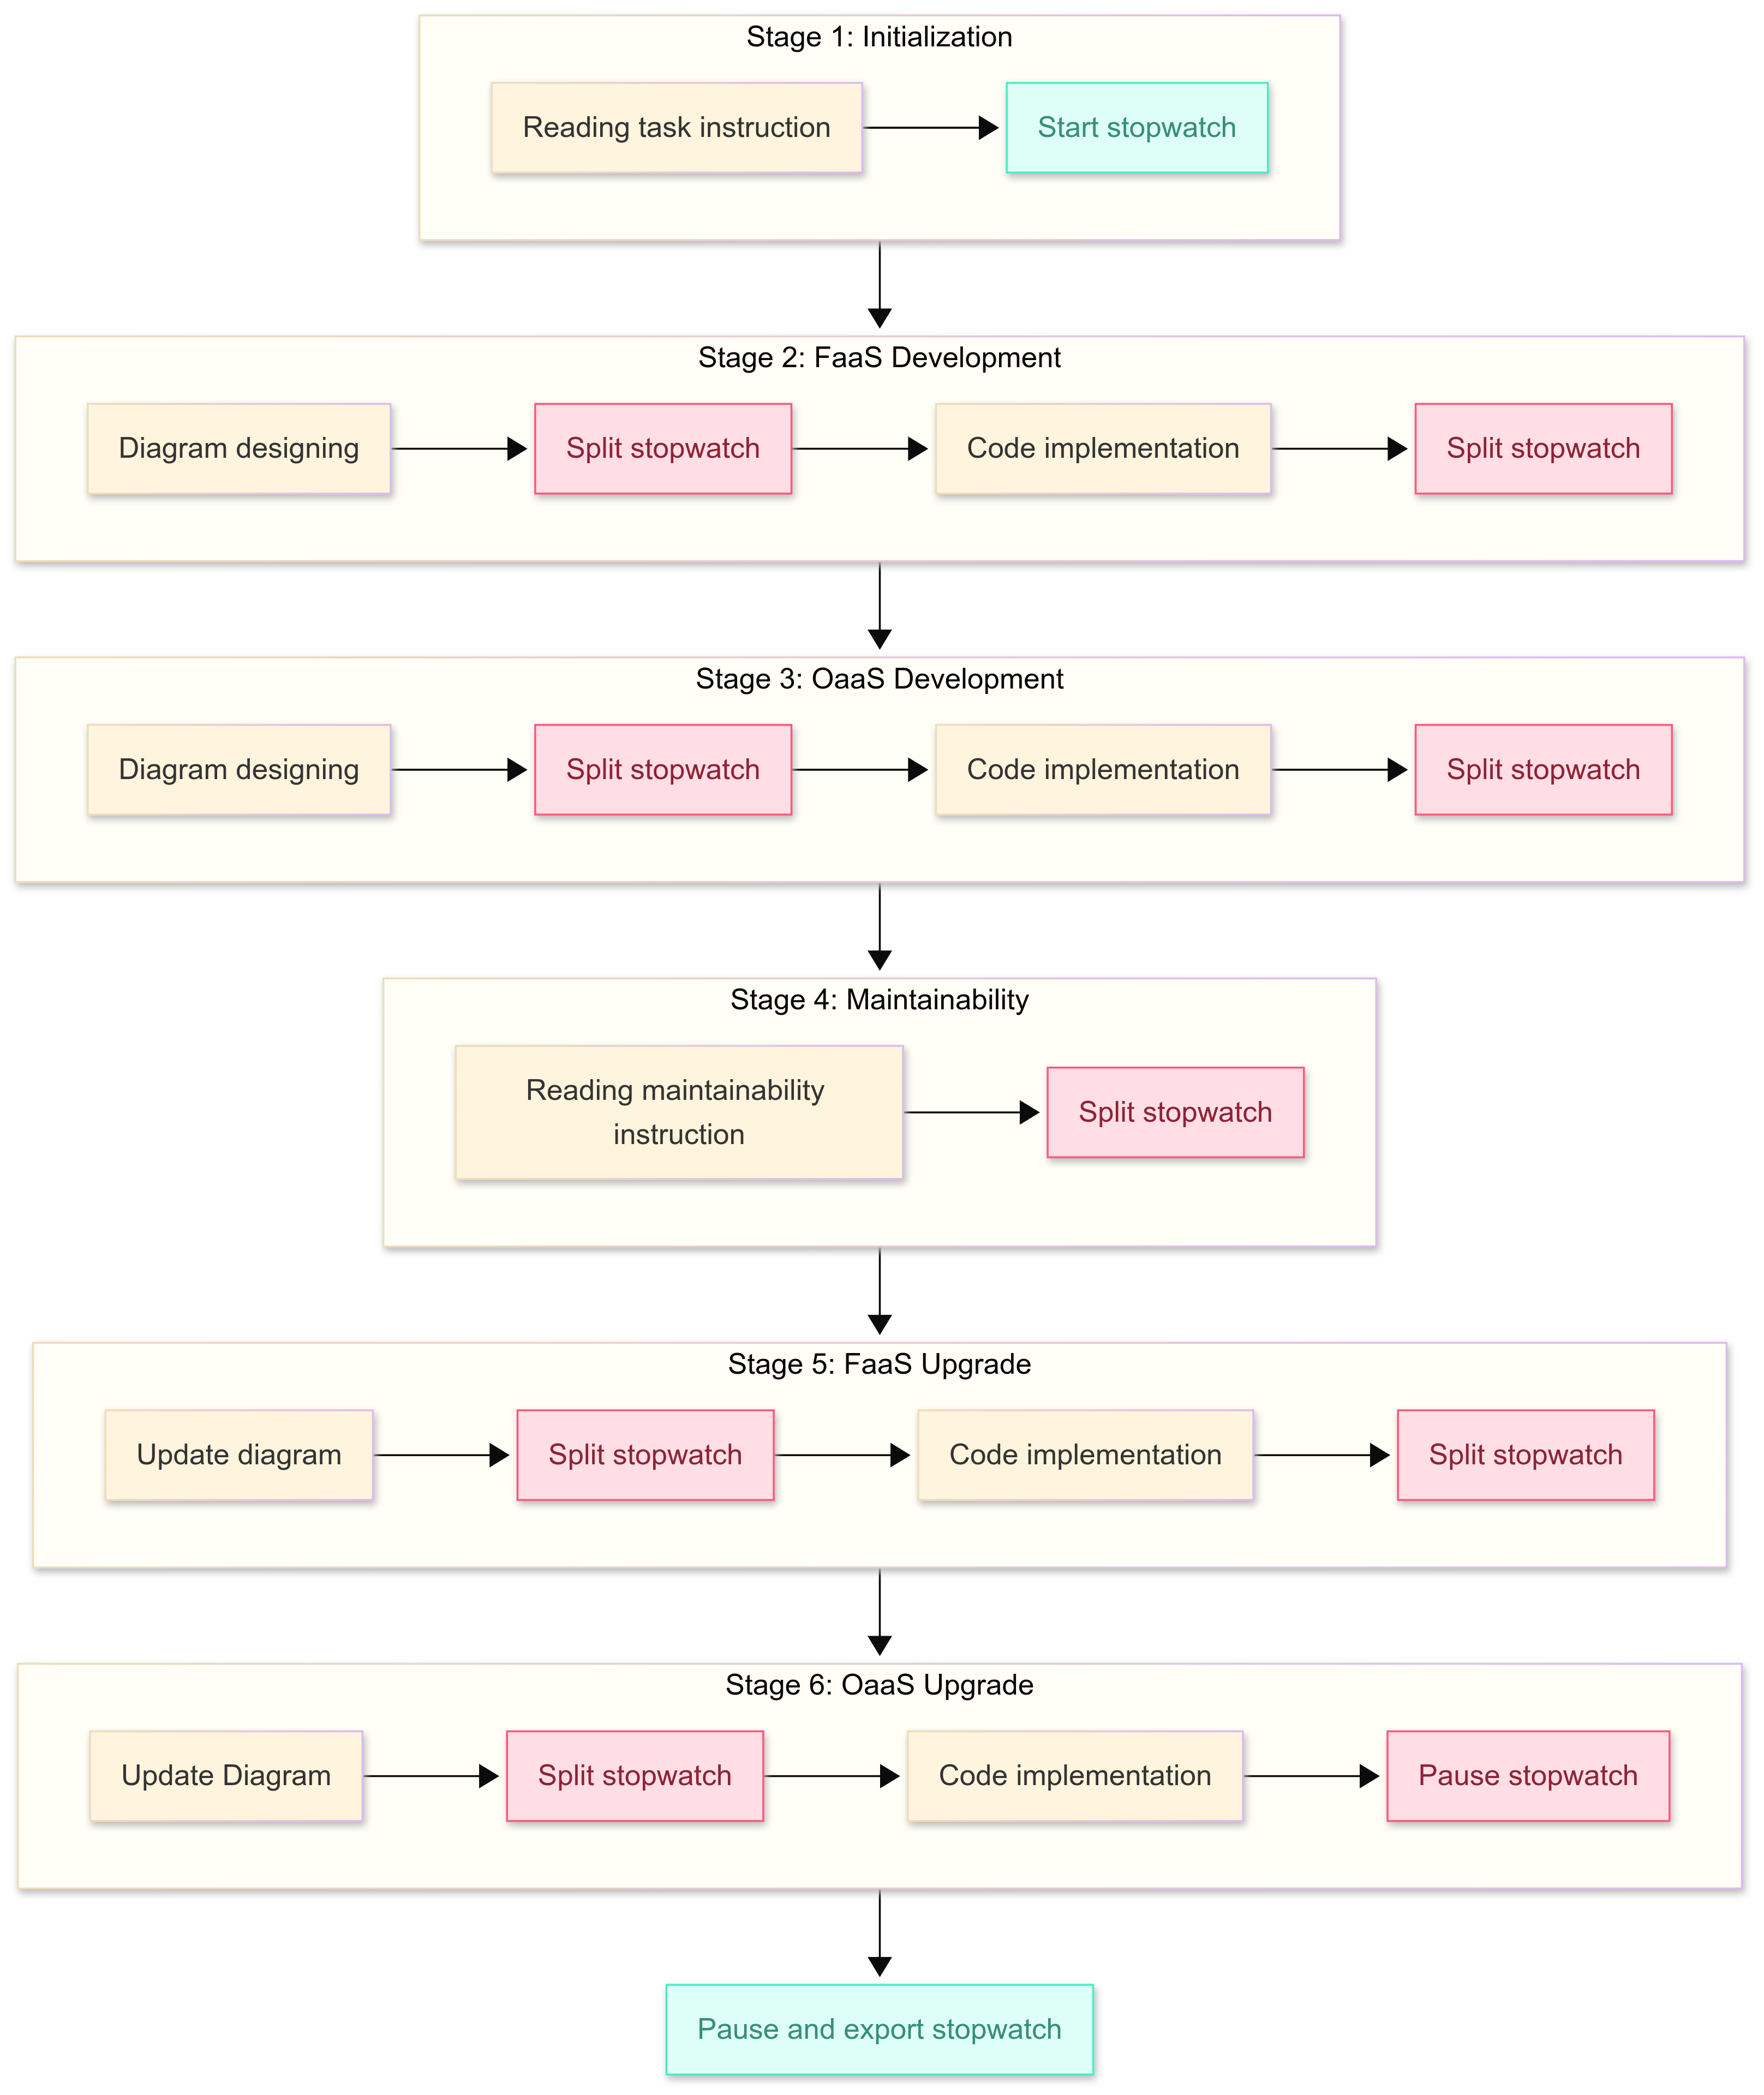

##### **Diagram Designing**

Feel free to use any software to create a diagram for your design\! We've also provided a helpful [parking lot example](diagrams/example_parking.drawio) that you can use with [draw.io](http://draw.io) extension.

### **Handy Mock APIs**
*(Here are some mock APIs for things like databases, messaging, and schedulers to help you build your solution.)*

#### **FaaS Mocks**

In [ ]:
# In-memory database
class MockKeyValueStore:
    def __init__(self):
        self._data = {}

    def get(self, key):
        return self._data.get(key)

    def set(self, key, value):
        self._data[key] = value

db = MockKeyValueStore()

# MQTT Client
class MockMqttClient:
    def publish(self, topic, payload):
        print(f"MQTT client publishing to topic '{topic}' with payload: {payload}")

    def subscribe(self, topic, callback_function):
        # Note: In a real FaaS environment, you would configure this subscription
        # as a trigger for the function, not by calling a subscribe method in the code.
        # This is for completeness of the mock API and does not reflect real use.
        print(f"MQTT client subscribing function '{callback_function.__name__}' to topic '{topic}'")

mqtt_client = MockMqttClient()

# Schedulers
class MockEventScheduler: # For Task 1
    def set_trigger(self, func_name, args, cron_expr):
        print(f"Scheduling function '{func_name}' with cron expression '{cron_expr}' and args: {args}")

event_scheduler = MockEventScheduler()

class MockScheduler: # For Task 2
    def set_timer(self, func_name, args, time):
        print(f"Scheduling function '{func_name}' to run in {time} seconds with args: {args}")

scheduler = MockScheduler()

# External API
class MockWeatherAPI: # For Task 3
    def get_rain_prediction(self, location):
        # In a real scenario, this would make an API call.
        # For this mock, we'll return a static value.
        print(f"Checking weather API for rain prediction at {location}")
        return {"will_rain_in_6_hours": False}

weather_api = MockWeatherAPI()

#### **OaaS Mocks**

In [ ]:
# Schedulers
class MockEventScheduler: # For Task 1
    def set_trigger(self, obj, func, args, cron_expr):
        print(f"Scheduling method '{func.__name__}' on object '{obj.object_id()}' with cron expression '{cron_expr}' and args: {args}")

event_scheduler = MockEventScheduler()

class MockScheduler: # For Task 2
    def set_timer(self, obj, func, args, time):
        print(f"Scheduling method '{func.__name__}' on object '{obj.object_id()}' to run in {time} seconds with args: {args}")

scheduler = MockScheduler()

# External API
class MockWeatherAPI: # For Task 3
    def get_rain_prediction(self, location):
        # In a real scenario, this would make an API call.
        # For this mock, we'll return a static value.
        print(f"Checking weather API for rain prediction at {location}")
        return {"will_rain_in_6_hours": False}

weather_api = MockWeatherAPI()


### **Task 1: Smart Thermostat Control System**



#### **The Lowdown**

Your mission is to design a control system for a smart thermostat. The main goal is to keep a room at a target temperature set by the user by controlling the heating and cooling. The thermostat will periodically send its current temperature and humidity readings.

#### **The Must-Haves**

* The thermostat sends its sensor readings (temperature, humidity) to the system every 5 minutes.  
* A user can set a new target temperature whenever they want.  
* The system needs to be smart enough to decide when to turn the heat on, turn the cooling on, or just turn everything off.  
* Users should be able to check the current temperature, humidity, target temperature, and what the system is doing (e.g., "heating", "cooling", "idle").

#### **The FaaS Approach**

*(Psst\! Just a friendly reminder to create your diagram first, and to keep your stopwatch running and hit "split" after you finish each part\!)*

In [ ]:
def handle_sensor_reading(event, context):
    """
    Gets triggered by the thermostat's sensor readings.
    It should update the current temperature and humidity.
    """
    thermostat_id = event['thermostat_id']
    temperature = event['temperature']
    humidity = event['humidity']

    # Your implementation here
    pass

    return {}

def set_target_temperature(event, context):
    """
    Gets triggered when a user sets a new target temperature.
    """
    thermostat_id = event['thermostat_id']
    target_temperature = event['target_temperature']

    # Your implementation here
    pass

    return {}

# You might need more functions to handle the other requirements!


#### **The OaaS Approach**

*(Psst\! Just a friendly reminder to create your diagram first, and to keep your stopwatch running and hit "split" after you finish each part\!)*

Note: The OaaS scaffolds below use the simplified API (global `oaas`, `OaasObject`, typed fields, and decorators). See `docs/reference.md` for details.

In [ ]:
from typing import Optional
from pydantic import BaseModel
from oaas_sdk2_py import oaas, OaasObject, OaasConfig

# Optional: configure mock/async for local thinking
oaas.configure(OaasConfig(async_mode=True, mock_mode=True))

class AmbientReading(BaseModel):
    temperature: float
    humidity: float

@oaas.service("Thermostat", package="tasks")
class Thermostat(OaasObject):
    # Typed, persisted state
    current_temp: float = 0.0
    current_humidity: float = 0.0
    target_temp: float = 22.0  # Celsius
    mode: str = "idle"  # heating|cooling|idle

    @oaas.constructor()
    def initialize(self, target_temp: float = 22.0):
        ...

    @oaas.method()
    async def update_ambient_conditions(self, reading: AmbientReading) -> None:
        ...

    # Accessor setter for simple state write (not exported as RPC)
    @oaas.setter()  # inferred: set_target_temp -> target_temp
    async def set_target_temp(self, value: float) -> float:
        ...

    # Accessors keep RPC surface smaller for simple reads
    @oaas.getter("current_temp")
    async def get_current_temp(self) -> float:
        ...

    @oaas.getter("current_humidity")
    async def get_current_humidity(self) -> float:
        ...

    @oaas.getter("target_temp")
    async def get_target_temp(self) -> float:
        ...

    @oaas.getter("mode")
    async def get_mode(self) -> str:
        ...

# Example usage (optional):
# t = Thermostat.create(obj_id=1)
# await t.update_ambient_conditions(AmbientReading(temperature=21.0, humidity=55.0))
# print(await t.get_mode())

### **Task 2: Intelligent Lighting System with Scene Control**



#### **The Lowdown**

You're designing a control system for smart light bulbs in an office. It should let users change the brightness and color of individual lights or apply cool predefined "scenes" (like "Focus" or "Relax") to a whole room. The system also needs to keep track of what each light is doing.

#### **The Must-Haves**

* The system can tell any light to change its brightness and color.  
* Users can create and save scenes that define the brightness and color for each light bulb.  
* Users can apply a saved scene to a room, which will update all the lights in that room at once.  
* Users can check the status and settings of every light in a room.

#### **The FaaS Approach**

*(Psst\! Just a friendly reminder to create your diagram first, and to keep your stopwatch running and hit "split" after you finish each part\!)*

In [ ]:
def control_light(event, context):
    """
    Sends a command to a specific light to change its state.
    """
    light_id = event['light_id']
    brightness = event.get('brightness')
    color = event.get('color')

    # Your implementation here
    pass

    return {}

def define_scene(event, context):
    """
    Saves a scene definition to the database.
    A scene includes settings for multiple lights.
    """
    room_id = event['room_id']
    scene_name = event['scene_name']
    light_settings = event['light_settings']

    # Your implementation here
    pass

    return {}

# You might need more functions to handle the other requirements!



#### **The OaaS Approach**

*(Psst\! Just a friendly reminder to create your diagram first, and to keep your stopwatch running and hit "split" after you finish each part\!)*

In [ ]:
from typing import Dict, Optional
from pydantic import BaseModel
from oaas_sdk2_py import oaas, OaasObject
oaas.configure(OaasConfig(async_mode=True, mock_mode=True))

class LightState(BaseModel):
    brightness: int  # 0-100
    color: str       # e.g., "#ffffff"

@oaas.service("Light", package="tasks")
class Light(OaasObject):
    light_id: str = ""
    state: LightState = LightState(brightness=100, color="#ffffff")

    @oaas.constructor()
    def initialize(self, light_id: str, state: Optional[LightState] = None):
        ...

    @oaas.method(serve_with_agent=True)
    async def set_state(self, new_state: LightState) -> LightState:
        ...

    # Accessors for simple reads/writes of state
    @oaas.getter("state")
    async def get_state(self) -> LightState:
        ...

    @oaas.setter("state")
    async def set_state_value(self, value: LightState) -> LightState:
        ...

@oaas.service("Room", package="tasks")
class Room(OaasObject):
    room_id: str = ""
    lights: Dict[str, int] = {}  # light_id -> object_id
    scenes: Dict[str, Dict[str, LightState]] = {}  # scene_name -> {light_id: state}

    @oaas.constructor()
    def initialize(self, room_id: str):
        ...

    @oaas.method()
    async def add_light(self, light_id: str, light_obj_id: int) -> bool:
        ...

    @oaas.method()
    async def define_scene(self, name: str, settings: Dict[str, LightState]) -> bool:
        ...

    @oaas.method()
    async def apply_scene(self, name: str) -> bool:
        ...

    @oaas.method()
    async def get_room_status(self) -> Dict[str, LightState]:
        ...

### **Task 3: Remote Irrigation System with Soil Moisture Feedback**

#### **The Lowdown**

You're creating an automated irrigation system for a farm. It has multiple watering valves and soil moisture sensors. The system needs to decide when to open and close each valve based on sensor data and a watering policy. Farmers should also be able to take over and control the valves manually.

#### **The Must-Haves**

* Sensors will send moisture level updates periodically.  
* The system should automatically open a valve if the soil gets too dry (below a set threshold).  
* The system should automatically close a valve after it's been open for a specific amount of time.  
* A farmer can manually command any valve to open or close.  
* A farmer can check the current moisture level and valve status for each zone.

#### **The FaaS Approach**

*(Psst\! Just a friendly reminder to create your diagram first, and to keep your stopwatch running and hit "split" after you finish each part\!)*

In [ ]:
def handle_moisture_update(event, context):
    """
    Gets triggered by a soil moisture sensor.
    Decides whether to open a valve based on the moisture level.
    """
    zone_id = event['zone_id']
    moisture_level = event['moisture_level']

    # Your implementation here
    pass

    return {}

def manual_valve_control(event, context):
    """
    Lets a farmer manually open or close a valve.
    """
    zone_id = event['zone_id']
    command = event['command'] # "open" or "close"

    # Your implementation here
    pass

    return {}

# You might need more functions to handle the other requirements!



#### **The OaaS Approach**

*(Psst\! Just a friendly reminder to create your diagram first, and to keep your stopwatch running and hit "split" after you finish each part\!)*

In [ ]:
from typing import Optional
from pydantic import BaseModel
from oaas_sdk2_py import oaas, OaasObject
oaas.configure(OaasConfig(async_mode=True, mock_mode=True))

class MoistureReading(BaseModel):
    level: float  # 0..1

@oaas.service("WateringZone", package="tasks")
class WateringZone(OaasObject):
    zone_id: str = ""
    moisture: float = 1.0
    valve_open: bool = False
    threshold: float = 0.3

    @oaas.constructor()
    def initialize(self, zone_id: str, threshold: float = 0.3):
        ...

    @oaas.method(serve_with_agent=True)
    async def set_valve(self, open_: bool) -> bool:
        ...

    @oaas.method()
    async def update_moisture(self, reading: MoistureReading) -> bool:
        ...

    @oaas.method()
    async def manual_override(self, open_: bool) -> bool:
        ...

    # Accessors for simple reads/writes
    @oaas.getter("moisture")
    async def get_moisture(self) -> float:
        ...

    @oaas.getter("valve_open")
    async def is_valve_open(self) -> bool:
        ...

    @oaas.setter()  # inferred: set_threshold -> threshold
    async def set_threshold(self, value: float) -> float:
        ...

### **Time for a Change-Up\!**

*(Hold off on these until you've finished the main parts of all three tasks. And don't forget to hit "split" on your timer after reading the question\!)*

#### **Task 1: Smart Thermostat**

How would you change your design to handle a weekly schedule with different target temperatures for different times of the day (like 70°F during the day and 65°F at night)? You can assume there's an event system that can trigger your code at specific times (like a cron job). Check the **Handy Mock API**.



#### **Task 2: Intelligent Lighting System**

The system needs to work with a new occupancy sensor in a special room. If the sensor says the room has been 'vacant' for more than 10 minutes, all the lights in that room should automatically turn off. When the sensor says 'occupied' again, the lights should go back to how they were before they turned off. You can assume there's a way to schedule your code to run after a certain amount of time. Check the **Handy Mock API**.



#### **Task 3: Remote Irrigation System**

How would you change your design to stop the sprinklers from turning on if an external weather API says it's going to rain in the next 6 hours? You can assume you have an API to check the weather forecast for any location. Check the **Handy Mock API**.

#### **Maintainability Task Implementation**

*(After you've thought about the change-up questions, add your updated code in the sections below. Remember to time your diagram and code updates separately\!)*

##### **Task 1: Smart Thermostat**

**Updated FaaS Implementation**

In [ ]:
# Your updated FaaS code here

**Updated OaaS Implementation**

In [ ]:
# Your updated OaaS code here

##### **Task 2: Intelligent Lighting System**

**Updated FaaS Implementation**

In [ ]:
# Your updated FaaS code here

**Updated OaaS Implementation**

In [ ]:
# Your updated OaaS code here

##### **Task 3: Remote Irrigation System**

**Updated FaaS Implementation**

In [ ]:
# Your updated FaaS code here

**Updated OaaS Implementation**

In [ ]:
# Your updated OaaS code here